## EXAM EXAMPLES

This notebook solves several exercises which are similar to the Qiskit developer exam exercises.

In [2]:
import qiskit
from qiskit import *
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright


## EXERCISE 1:

Which statement will create a quantum circuit with four quantum bits and four classical bits?

A. QuantumCircuit(4, 4)

B. QuantumCircuit(4)

C. QuantumCircuit(QuantumRegister(4, 'qr0'),

QuantumRegister(4, 'cr1'))

D. QuantumCircuit([4, 4])

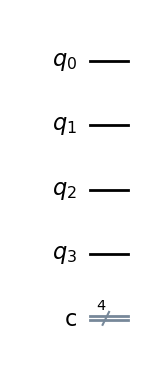

In [11]:
circuit = QuantumCircuit(4,4)
circuit.draw('mpl')

#### Answer A. is correct.
#### B. produces a circuit with four qubits and no classical registers.
#### C. produces a circuit with four qubits named qr0 and four qubits named cr1. This could be the answer if we change the second QuantumRegister() function with ClassicalRegister(4, 'cr1').
#### D. returns an error.

## EXERCISE 2:

Given this code fragment, what is the probability that a measurement would result in $|0>$ ?

qc = QuantumCircuit(1)

qc.ry(3 * math.pi/4, 0)

A. 0.8536

B. 0.5

C. 0.1464

D. 1.0

#### Answer:
The probability of measuring $|0>$ after a y-rotation of $\frac{3\pi}{4}$ is 0.1464 since the final state is $|\psi> =   ( (\cos{(3 \pi / 4)}|0> + \sin{(3 \pi / 4)} |1> )$

Let's check it with code:

[[0.146+0.j 0.354+0.j]
 [0.354+0.j 0.854+0.j]]
!!! the 00 component of the density matrix is answer C.


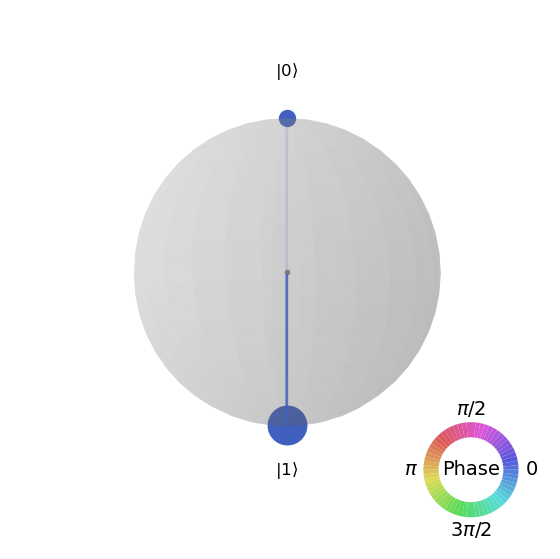

In [53]:
import math
import numpy as np
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

qc = QuantumCircuit(1)
qasm = Aer.get_backend('aer_simulator')
qc.ry(3*math.pi/4,0)
qc.save_statevector()

#qc.draw('mpl')

qasm_job = qasm.run(circuits = qc, shots = 1000)
qc_vector = qasm_job.result().get_statevector()
qc_counts = qasm_job.result().get_counts()

# if you want to generate the density matrix by hand
qc_state = np.array([qc_vector])
qc_state = np.dot(qc_state.transpose() , qc_state)
print(np.round(qc_state, decimals = 3))
print('!!! the 00 component of the density matrix is answer C.')
plot_state_qsphere(qc_state)

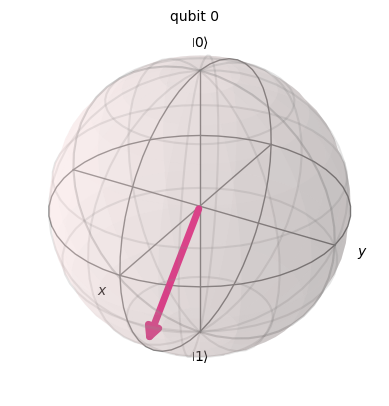

In [52]:
plot_bloch_multivector(np.array(qc_vector))

## EXERCISE 3:

Assuming the fragment below, which three code fragments would produce the circuit illustrated?

inp_reg = QuantumRegister(2, name='inp')

ancilla = QuantumRegister(1, name='anc')

qc = QuantumCircuit(inp_reg, ancilla)

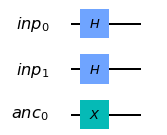

#### Answers:
<table table border="1" 
           align="left">
    <tr><th>A. qc.h(inp_reg) <br>
    qc.x(ancilla)<br>
    qc.draw()<br>
    <th><th>B. qc.h(inp_reg[0:2])<br>
    qc.x(ancilla[0])<br>
    qc.draw()<br>
    <th><th>C. qc.h(inp_reg[0:1])<br>
    qc.x(ancilla[0])<br>
    qc.draw()<br><tr><tr>
    <th>D. qc.h(inp_reg[0])<br>
    qc.h(inp_reg[1])<br>
    qc.x(ancilla[0])<br>
    qc.draw()<br>
    <th><th>E. qc.h(inp_reg[1])<br>
    qc.h(inp_reg[2])<br>
    qc.x(ancilla[1])<br>
    qc.draw()<br>
    <th><th>F. qc.h(inp_reg)<br>
    qc.h(inp_reg)<br>
    qc.x(ancilla)<br>
    qc.draw()<br><td><tr>
<table>